In [1]:
%matplotlib inline

# Random Walk
This notebook simulates a random walk for some amount of particles. This can be plugged into the FCS notebook to calculate diffusion constants of the random walk particles, as a sanity check.

## Trajectory Attributes

The core object used in the virtual FCS notebook is a Trajectory object.



### `Trajectory.xyz[frame_index, atom_index]`
2-D Numpy array storing tuples of (X,Y,Z) coordinates for each atom `atom_index` at each time step `frame_index`

#### `Trajectory.topology.n_residues`
Integer, number of residues/atoms. Equivalent for this purpose

#### `Trajectory.topology.atoms`
List of `atom` objects. Each `atom` object should have an attribute `atom.index` that's its index in the Trajectory, for use in `Trajectory.xyz`

## Random Walk Parameters

In [2]:
N_WALKERS = 1000

TSTEPS = 150000

D = 15

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from trajectory import Atom, Topology, FakeTrajectory

### Run simulation

In [4]:
%%time
d_scaling = np.sqrt(4*D)

xyz = np.full(shape=(TSTEPS, N_WALKERS, 3), fill_value=[0.0,0.0,0.0])
_RMSD = np.sqrt(TSTEPS * 4 * D)

print(_RMSD)

3000.0
CPU times: user 832 ms, sys: 661 ms, total: 1.49 s
Wall time: 1.49 s


In [5]:
for w in range(N_WALKERS):
    
    xyz[1:,w,0] = np.cumsum(np.cos(np.random.uniform(0,2,TSTEPS-1) * np.pi) * d_scaling )
    xyz[1:,w,1] = np.cumsum(np.sin(np.random.uniform(0,2,TSTEPS-1) * np.pi) * d_scaling )
    
    # Add initial offset
    xyz[:,w,0] += np.random.uniform(-_RMSD,_RMSD)
    xyz[:,w,1] += np.random.uniform(-_RMSD,_RMSD)

## Calculate Diffusion Constant

In [6]:
MSD = np.mean([(xyz[TSTEPS-1,w,0]-xyz[0,w,0])**2 + (xyz[0,w,1] - xyz[TSTEPS-1,w,1])**2 for w in range(N_WALKERS)])

print("MSD should be %f, measured at %f" % (_RMSD, np.sqrt(TSTEPS * 4 * D)))
print("D is set to %f, calculated at %f" % (D, MSD/(4 * TSTEPS)))

MSD should be 3000.000000
D is set to 15.000000, calculated at 15.368582


In [7]:
xyz[1,1] 
    
print(len(xyz))
t = FakeTrajectory()
t.initialize(xyz, N_WALKERS)

print(len(t.xyz))
print(t.topology.n_residues)
print(t.topology.atoms[3].index)

with open('/home/jd/phd/virtual_fcs/D%d.pkl' % D, 'wb') as output:
    import pickle
    pickle.dump(t, output)
    print("Written to D{}.pkl".format(D))
    
print("Done")

# t.reduce(.5)
# len(t)

150000
150000
1000
3
Written to D15.pkl
Done


In [8]:
#len(pickle.dumps(t, -1))
# %run fcs_notebook.ipynb

## Plot Walks

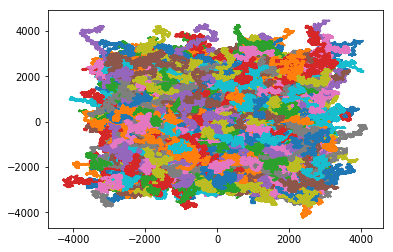

In [9]:
for w in range(0,N_WALKERS, 1):

    plt.plot(xyz[:10000,w,0], xyz[:10000,w,1], linestyle='-')

In [10]:
# import pickle
# t = pickle.load(open('../../windrive/linux/output.pkl', 'rb'))

# for w in range(0,t.topology.n_residues, 10):

#     plt.plot(t.xyz[:10000,w,0], t.xyz[:10000,w,1], linestyle='-')

## Test code for computing D using MSD and step length

### MSD

In [ ]:
total_MSD = np.mean([(xyz[TSTEPS-1,w,0]-xyz[0,w,0])**2 + \
               (xyz[0,w,1] - xyz[TSTEPS-1,w,1])**2 \
               for w in range(N_WALKERS)])

step_lengths = []
for w in range(N_WALKERS):
    _step_lengths = []
    
    for t in range(1,TSTEPS):
        step = (xyz[t, w, 0] - xyz[t-1, w, 0]) **2 + \
                    (xyz[t, w, 1] - xyz[t-1, w, 1]) **2
        _step_lengths.append( step )
    
    step_lengths.append(_step_lengths)

In [ ]:
flattened = [y for x in step_lengths for y in x]
print(max(flattened))

hist, bins = np.histogram(flattened, bins=10)
n, _bins, patches = plt.hist(flattened, bins='auto')

# Calculate the mean step length across all walkers
mean_step_length = np.mean(step_lengths)

print("Mean squared step length is {}".format(mean_step_length))

_D = mean_step_length/4

print("D is {}".format(_D))

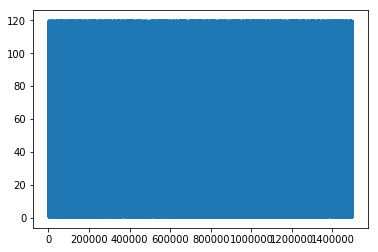

In [13]:
plt.plot(flattened[::100])

Do a curvefit on a Rayleigh distribution to find parameters of the distribution.

Step size for a 2D random walk should follow a Rayleigh distribution

**THIS IS JUNK, but the curve fit procedure may be useful later**